# prévision des crédits logmements

In [4]:
#importer les packages
import pandas as pd

# Ouvrir la base de donnée 

In [5]:
# importer notre base de données et l'ouvrir
df_credit = pd.read_csv('C:/Users/ASUS/Desktop/projets perso/Credit_bancaire_python/archive/train.csv')

In [6]:
df_credit

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
#cree une copie de la base de donnée
df = df_credit.copy()

In [8]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
#la taille de la bd
df.shape

(614, 13)

In [11]:
#verifier les valeurs manquantes
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Pour supprimer les valeurs manquantes : 
- variables catégoriques : remplacer par le mode
- variables numériques : remplacer par la mediane

In [12]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [13]:
var_cat = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education','Self_Employed','Credit_History', 'Property_Area', 'Loan_Status']
var_num = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']

print ('les variables catégoriques sont : ',var_cat )
print ('les variables numériques sont : ',var_num )

les variables catégoriques sont :  ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
les variables numériques sont :  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


In [20]:
#supprimer les valeurs manquantes coté variables catégoriques
#remplacer les valeurs manquantes par le mode 
#il y a plusieurs mode 
df['Gender'].fillna(df['Gender'].mode()[0],inplace = True)
df['Married'].fillna(df['Married'].mode()[0],inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace = True)

In [21]:
#supprimer les valeurs manquantes coté variables numériques
#on remplace les valeurs manquantes par la mediane 
#on ne met pas de zero car y a une seule mediane
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace = True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace = True)




In [22]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Analyse univariée (variable par variable)

In [23]:
#on choisira la variable -Loan status- qui sera la variable target 
# qui représente si le crédit est accordé ou pas
#elle dépend de toutes les autres variables (features)
df ['Loan_Status'].value_counts()


Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [24]:
#le pourcentage des crédits accordés 
df ['Loan_Status'].value_counts(normalize = True)*100

Loan_Status
Y    68.729642
N    31.270358
Name: proportion, dtype: float64

<Axes: title={'center': 'Taux de Crédits accordés et non accordés'}, xlabel='Loan_Status'>

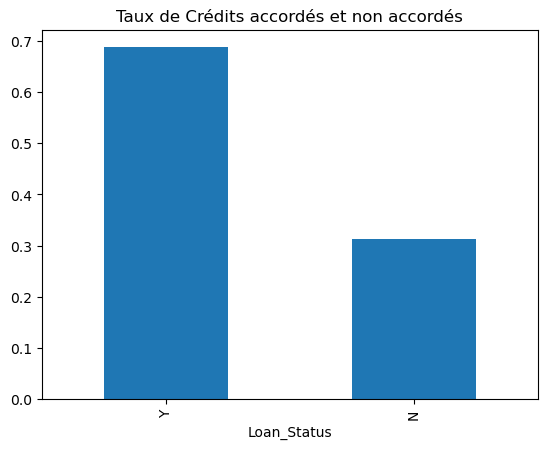

In [25]:
df ['Loan_Status'].value_counts(normalize = True).plot.bar(title = 'Taux de Crédits accordés et non accordés')